In [103]:
'''
Title: Gross Income Correlations in MCU/DC Movies
Author: Aron Kim
Date: 11/22/24

This project aims to find correlations to the box office gross income within US/Canada and also outside of US/Canada.
The process will include finding missing data, data cleaning, heat mapping, plotting, finding correlations, and creating a linear regression model.
My hypothesis for correlations with gross income within US/Canada will be connected to higher budgets, release date, and the rotten tomatoes critic score.
My hypothesis for correlations with gross income outside of US/Canada will be connected to higher budgets and the rotten tomatoes critic score.
'''

'\nTitle: Gross Income Correlations in MCU/DC Movies\nAuthor: Aron Kim\nDate: 11/22/24\n\nThis project aims to find correlations to the box office gross income within US/Canada and also outside of US/Canada.\nThe process will include finding missing data, data cleaning, heat mapping, plotting, finding correlations, and creating a linear regression model.\nMy hypothesis for correlations with gross income within US/Canada will be connected to higher budgets, release date, and the rotten tomatoes critic score.\nMy hypothesis for correlations with gross income outside of US/Canada will be connected to higher budgets and the rotten tomatoes critic score.\n'

In [57]:
## Starting by importing necessary packages for the project

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


## Reading in the data that will be used for this project

df = pd.read_csv(r'C:\Users\aronk\OneDrive\Desktop\Portfolio Projects\PythonMovieCorrelation\MCUDCcorrelation.csv')

In [58]:
## Looking at the data to see what we're working with

df.head()

,Film,U.S. release date,Box office gross Domestic (U.S. and Canada ),Box office gross Other territories,Box office gross Worldwide,Budget,MCU,Phase,Distributor,MPAA Rating,Length,Minutes,Franchise,Character Family,Domestic %,Gross to Budget,Rotten Tomatoes Critic Score,Male/Female-led,Year,Inflation Adjusted Worldwide Gross,Inflation Adjusted Budget,2.5x prod,Break Even
0,Superman,15/12/1978,"$134,478,449","$166,000,000","$300,478,449","$55,000,000",False,NaN,Warner Bros.,PG,02:23:00,143.0,DC,Superman,45%,5.46,94.0,Male,1978.0,"$1,404,237,104","$257,033,544","$137,500,000",Success
1,Superman II,19/06/1981,"$108,185,706","$108,200,000","$216,385,706","$54,000,000",False,NaN,Warner Bros.,PG,02:07:00,127.0,DC,Superman,50%,4.01,83.0,Male,1981.0,"$725,336,273","$181,010,842","$135,000,000",Success
2,Superman III,17/06/1983,"$59,950,623","$20,300,000","$80,250,623","$39,000,000",False,NaN,Warner Bros.,PG,02:05:00,125.0,DC,Superman,75%,2.06,29.0,Male,1983.0,"$245,506,947","$119,310,861","$97,500,000",Flop
3,Supergirl,21/11/1984,"$14,296,438",NaN,"$14,296,438","$35,000,000",False,NaN,Tri-Star Pictures,PG,02:04:00,124.0,DC,Superman,100%,0.41,8.0,Female,1984.0,"$41,926,345","$102,642,497","$87,500,000",Flop
4,Howard the Duck,01/08/1986,"$16,295,774","$21,667,000","$37,962,774","$37,000,000",False,NaN,Universal Pictures,PG,01:50:00,110.0,Marvel,Howard the Duck,43%,1.03,13.0,Male,1986.0,"$37,962,774","$37,000,000","$92,500,000",Flop


In [90]:
## Looking for null values within the data
for col in df.columns:
    isnull = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, isnull))

# There are some null values but it is insignificant because the values are close to zero.

Film - 0.0%
U.S. release date - 0.0%
Gross_US - 0.0%
Gross_Outside - 0.0%
Box office gross Worldwide - 0.0%
Budget - 0.0%
MCU - 0.0%
Phase - 0.0%
Distributor - 0.0%
MPAA Rating - 0.0%
Length - 0.0%
Minutes - 0.0%
Franchise - 0.0%
Character Family - 0.0%
Domestic % - 0.0%
Gross to Budget - 0.0%
Rotten Tomatoes Critic Score - 0.0%
Male/Female-led - 0.0%
Year - 0.0%
Inflation Adjusted Worldwide Gross - 0.0%
Inflation Adjusted Budget - 0.0%
2.5x prod - 0.0%
Break Even - 0.0%
New_Column - 0.0%
Correct_Year - 0.0%


In [85]:
## Looking at the data types for each of the columns

df.dtypes

Film                                     int8
U.S. release date                        int8
Gross_US                                int32
Gross_Outside                            int8
Box office gross Worldwide               int8
Budget                                float64
MCU                                      int8
Phase                                 float64
Distributor                              int8
MPAA Rating                              int8
Length                                   int8
Minutes                               float64
Franchise                                int8
Character Family                         int8
Domestic %                               int8
Gross to Budget                       float64
Rotten Tomatoes Critic Score          float64
Male/Female-led                          int8
Year                                    int32
Inflation Adjusted Worldwide Gross       int8
Inflation Adjusted Budget                int8
2.5x prod                         

In [61]:
## Begin data cleaning


# Changing data type of column "year" from float to int to make data easier to look at.

df['Year'] = pd.to_numeric(df['Year'], errors='coerce').fillna(0).astype(int)

In [93]:
# Making sure every row in the column MCU that says "False" has the value "NaN" in the column Phase, and is not null.
df['New_Column'] = (df['MCU'] == False) & (df['Phase'] != ('NaN')) & (df['Phase'].notna())
print(df[['MCU', 'Phase', 'New_Column']].head(15))

     MCU     Phase  New_Column
58     1  2.000000       False
98     0  2.848485        True
13     0  2.848485        True
47     1  1.000000       False
6      0  2.848485        True
81     0  2.848485        True
50     1  2.000000       False
46     0  2.848485        True
24     0  2.848485        True
38     0  2.848485        True
18     0  2.848485        True
105    0  2.848485        True
63     1  3.000000       False
87     0  2.848485        True
86     1  3.000000       False


In [94]:
# There are two columns for release date of the movie so I am adding a new column with the correct year.

df['Correct_Year'] = df['U.S. release date'].astype(str).str[-4:]
df['Correct_Year'].head(15)

58      3
98      0
13     63
47     21
6      53
81     92
50     14
46     70
24     47
38     32
18     56
105    72
63     34
87     22
86     11
Name: Correct_Year, dtype: object

In [95]:
# Changing name of column to call it easier.

df = df.rename(columns={'Box office gross Domestic (U.S. and Canada )' : 'Gross_US'})
df = df.rename(columns={'Box office gross Other territories' : 'Gross_Outside'})
df.head(15)

,Film,U.S. release date,Gross_US,Gross_Outside,Box office gross Worldwide,Budget,MCU,...,Year,Inflation Adjusted Worldwide Gross,Inflation Adjusted Budget,2.5x prod,Break Even,New_Column,Correct_Year
58,5,3,459005868,111,9,459005868.0,1,...,2015,11,44,48,1,False,3
98,58,0,73865530,110,22,73865530.0,0,...,2022,26,72,10,0,True,0
13,71,63,1710972,109,11,1710972.0,0,...,1997,44,51,29,0,True,63
47,82,21,623357910,108,10,623357910.0,1,...,2012,14,36,43,1,False,21
6,92,53,192816,107,43,192816.0,0,...,1989,85,71,51,0,True,53
81,3,92,335061807,106,5,335061807.0,0,...,2018,9,28,30,1,True,92
50,51,14,409013994,105,7,409013994.0,1,...,2013,6,30,39,1,False,14
46,42,70,51774002,104,18,51774002.0,0,...,2012,21,65,6,0,True,70
24,22,47,52411906,103,17,52411906.0,0,...,2004,20,67,8,0,True,47
38,102,32,107509799,102,27,107509799.0,0,...,2009,40,26,22,0,True,32


In [96]:
# Ordering data by gross revenue from highest to lowest.
df.sort_values(by=['Gross_US'], ascending=False, na_position='first')
df.sort_values(by=['Gross_Outside'], ascending=False, na_position='first')
df.head(15)

,Film,U.S. release date,Gross_US,Gross_Outside,Box office gross Worldwide,Budget,MCU,...,Year,Inflation Adjusted Worldwide Gross,Inflation Adjusted Budget,2.5x prod,Break Even,New_Column,Correct_Year
58,5,3,459005868,111,9,459005868.0,1,...,2015,11,44,48,1,False,3
98,58,0,73865530,110,22,73865530.0,0,...,2022,26,72,10,0,True,0
13,71,63,1710972,109,11,1710972.0,0,...,1997,44,51,29,0,True,63
47,82,21,623357910,108,10,623357910.0,1,...,2012,14,36,43,1,False,21
6,92,53,192816,107,43,192816.0,0,...,1989,85,71,51,0,True,53
81,3,92,335061807,106,5,335061807.0,0,...,2018,9,28,30,1,True,92
50,51,14,409013994,105,7,409013994.0,1,...,2013,6,30,39,1,False,14
46,42,70,51774002,104,18,51774002.0,0,...,2012,21,65,6,0,True,70
24,22,47,52411906,103,17,52411906.0,0,...,2004,20,67,8,0,True,47
38,102,32,107509799,102,27,107509799.0,0,...,2009,40,26,22,0,True,32


In [66]:
# Data is not in order, checking to see if it is because of the null values.

df[['Gross_US', 'Gross_Outside']].isna().sum()

Gross_US         1
Gross_Outside    2
dtype: int64

In [67]:
# The gross income columns are objects that have the sign "$" and "," which is preventing me from switching the type to an integer.
# They also has null values which prevent me from switching the type as well.
# These codes remove those values and give me the numerical values that I need. They also change the null values to 0 as well.

df['Gross_US'] = df['Gross_US'].astype(str).str.replace(r'[\$,]', '', regex=True)
df['Gross_US'] = df['Gross_US'].replace('nan', '0')
df['Gross_US'] = df['Gross_US'].astype(float).fillna(0).astype(int)

df.dtypes

Film                                   object
U.S. release date                      object
Gross_US                                int32
Gross_Outside                          object
Box office gross Worldwide             object
Budget                                 object
MCU                                    object
Phase                                 float64
Distributor                            object
MPAA Rating                            object
Length                                 object
Minutes                               float64
Franchise                              object
Character Family                       object
Domestic %                             object
Gross to Budget                       float64
Rotten Tomatoes Critic Score          float64
Male/Female-led                        object
Year                                    int32
Inflation Adjusted Worldwide Gross     object
Inflation Adjusted Budget              object
2.5x prod                         

In [97]:
# Ordering data by US/Canada gross revenue from highest to lowest.

df.sort_values(by=['Gross_US'], ascending=False, inplace=True)
df.head(15)

,Film,U.S. release date,Gross_US,Gross_Outside,Box office gross Worldwide,Budget,MCU,...,Year,Inflation Adjusted Worldwide Gross,Inflation Adjusted Budget,2.5x prod,Break Even,New_Column,Correct_Year
84,6,102,858373000,2,29,858373000.0,1,...,2019,32,57,57,1,False,102
96,70,77,814115070,0,12,814115070.0,1,...,2021,15,30,39,1,False,77
74,17,66,700426566,94,8,700426566.0,1,...,2018,8,30,39,1,False,66
75,7,105,678815482,1,28,678815482.0,1,...,2018,31,53,54,1,False,105
47,82,21,623357910,108,10,623357910.0,1,...,2012,14,36,43,1,False,21
36,84,81,534987076,78,0,534987076.0,0,...,2008,12,47,38,1,True,81
58,5,3,459005868,111,9,459005868.0,1,...,2015,11,44,48,1,False,3
103,18,51,453829060,63,106,453829060.0,1,...,2022,105,44,48,1,False,51
49,85,87,448149584,92,2,448149584.0,0,...,2012,13,55,48,1,True,87
82,27,43,426829839,95,3,426829839.0,1,...,2019,3,14,28,1,False,43


In [98]:
# Ordering data by gross revenue of countries other than US/Canada from highest to lowest.

df.sort_values(by=['Gross_Outside'], ascending=False, inplace=True)
df.head(15)

,Film,U.S. release date,Gross_US,Gross_Outside,Box office gross Worldwide,Budget,MCU,...,Year,Inflation Adjusted Worldwide Gross,Inflation Adjusted Budget,2.5x prod,Break Even,New_Column,Correct_Year
113,99,113,0,112,113,0.0,2,...,0,113,82,60,2,False,113
3,73,91,14296438,112,20,14296438.0,0,...,1984,60,1,56,0,True,91
58,5,3,459005868,111,9,459005868.0,1,...,2015,11,44,48,1,False,3
98,58,0,73865530,110,22,73865530.0,0,...,2022,26,72,10,0,True,0
13,71,63,1710972,109,11,1710972.0,0,...,1997,44,51,29,0,True,63
47,82,21,623357910,108,10,623357910.0,1,...,2012,14,36,43,1,False,21
6,92,53,192816,107,43,192816.0,0,...,1989,85,71,51,0,True,53
81,3,92,335061807,106,5,335061807.0,0,...,2018,9,28,30,1,True,92
50,51,14,409013994,105,7,409013994.0,1,...,2013,6,30,39,1,False,14
46,42,70,51774002,104,18,51774002.0,0,...,2012,21,65,6,0,True,70


In [70]:
## Beginning testing for correlations related to gross revenue.

In [99]:
# I am using a for loop to change the column types that are objects into floats.
# I need to change them to numerical values so that I can put them on a correlation heatmap and also the scatte plot.

df_num = df
for col_name in df_num.columns:
    if df_num[col_name].dtype == 'object':
        df_num[col_name] = df_num[col_name].fillna('Unknown')
        df_num[col_name] = df_num[col_name].astype('category')
        df_num[col_name] = df_num[col_name].cat.codes
df_num.head(15)

,Film,U.S. release date,Gross_US,Gross_Outside,Box office gross Worldwide,Budget,MCU,...,Year,Inflation Adjusted Worldwide Gross,Inflation Adjusted Budget,2.5x prod,Break Even,New_Column,Correct_Year
113,99,113,0,112,113,0.0,2,...,0,113,82,60,2,False,17
3,73,91,14296438,112,20,14296438.0,0,...,1984,60,1,56,0,True,105
58,5,3,459005868,111,9,459005868.0,1,...,2015,11,44,48,1,False,37
98,58,0,73865530,110,22,73865530.0,0,...,2022,26,72,10,0,True,0
13,71,63,1710972,109,11,1710972.0,0,...,1997,44,51,29,0,True,74
47,82,21,623357910,108,10,623357910.0,1,...,2012,14,36,43,1,False,28
6,92,53,192816,107,43,192816.0,0,...,1989,85,71,51,0,True,63
81,3,92,335061807,106,5,335061807.0,0,...,2018,9,28,30,1,True,106
50,51,14,409013994,105,7,409013994.0,1,...,2013,6,30,39,1,False,20
46,42,70,51774002,104,18,51774002.0,0,...,2012,21,65,6,0,True,82


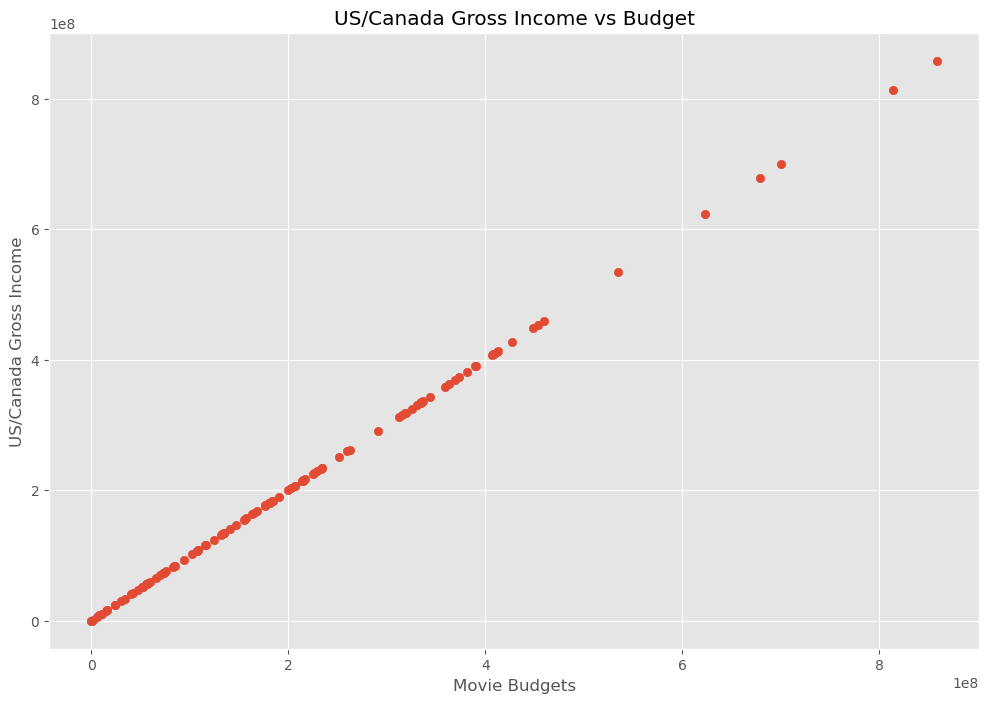

In [72]:
# Using scatter plot to compare US/Canada gross income vs budget.
# Changed Budget column into an int so that I am able to add it to the scatter plot.
# Scatter plot shows high correlation between US/Canada gross income and budget.

df['Budget'] = df['Gross_US'].replace({'$': '', ',':''}, regex=True).fillna(0).astype(int)
plt.scatter(x=df['Budget'], y=df['Gross_US'])

plt.title('US/Canada Gross Income vs Budget')
plt.xlabel('Movie Budgets')
plt.ylabel('US/Canada Gross Income')
plt.show()

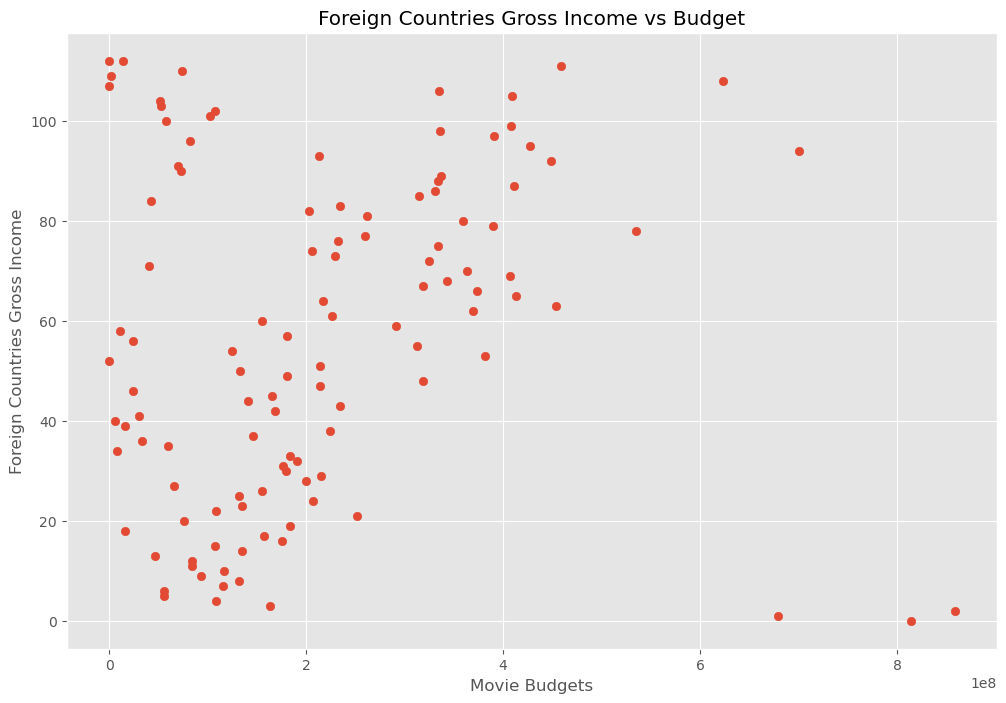

In [73]:
# Using scatter plot to compare countries aside from US/Canada gross income vs budget.
# Scatter plot shows positive correlation between US/Canada gross income and budget.

plt.scatter(x=df['Budget'], y=df['Gross_Outside'])

plt.title('Foreign Countries Gross Income vs Budget')
plt.xlabel('Movie Budgets')
plt.ylabel('Foreign Countries Gross Income')
plt.show()

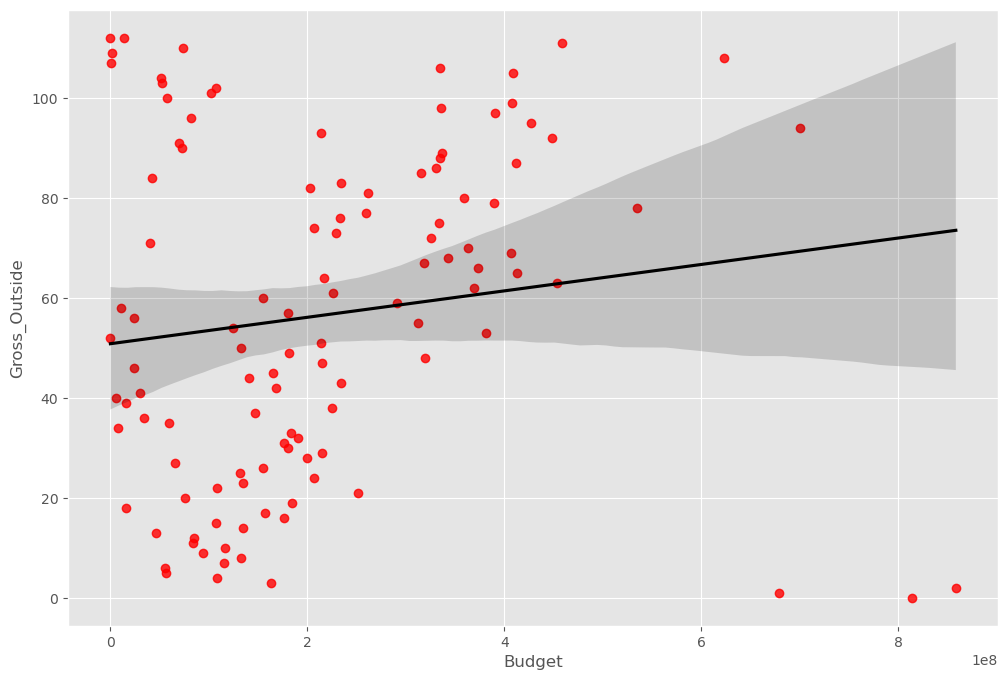

In [74]:
# Foreign Countries Gross Income vs Budget shows positive correlation but will use seaborn for regression plot to see date more accurately.
# US/Canada Gross Income vs Budget shows high correlation so will not check with regression plot.

sns.regplot(x='Budget', y='Gross_Outside', data=df, scatter_kws={"color": "red"}, line_kws={"color":"black"})
plt.show()            

In [75]:
# My hypothesis that there is a correlation between gross income and budget has been proven.

# For the other columns I will check the correlation with gross income by using the for loop I made before.
# I will begin with US/Canada gross income and then gross income of countries outside of US/Canada.

In [100]:
df.head(15)

,Film,U.S. release date,Gross_US,Gross_Outside,Box office gross Worldwide,Budget,MCU,...,Year,Inflation Adjusted Worldwide Gross,Inflation Adjusted Budget,2.5x prod,Break Even,New_Column,Correct_Year
113,99,113,0,112,113,0.0,2,...,0,113,82,60,2,False,17
3,73,91,14296438,112,20,14296438.0,0,...,1984,60,1,56,0,True,105
58,5,3,459005868,111,9,459005868.0,1,...,2015,11,44,48,1,False,37
98,58,0,73865530,110,22,73865530.0,0,...,2022,26,72,10,0,True,0
13,71,63,1710972,109,11,1710972.0,0,...,1997,44,51,29,0,True,74
47,82,21,623357910,108,10,623357910.0,1,...,2012,14,36,43,1,False,28
6,92,53,192816,107,43,192816.0,0,...,1989,85,71,51,0,True,63
81,3,92,335061807,106,5,335061807.0,0,...,2018,9,28,30,1,True,106
50,51,14,409013994,105,7,409013994.0,1,...,2013,6,30,39,1,False,20
46,42,70,51774002,104,18,51774002.0,0,...,2012,21,65,6,0,True,82


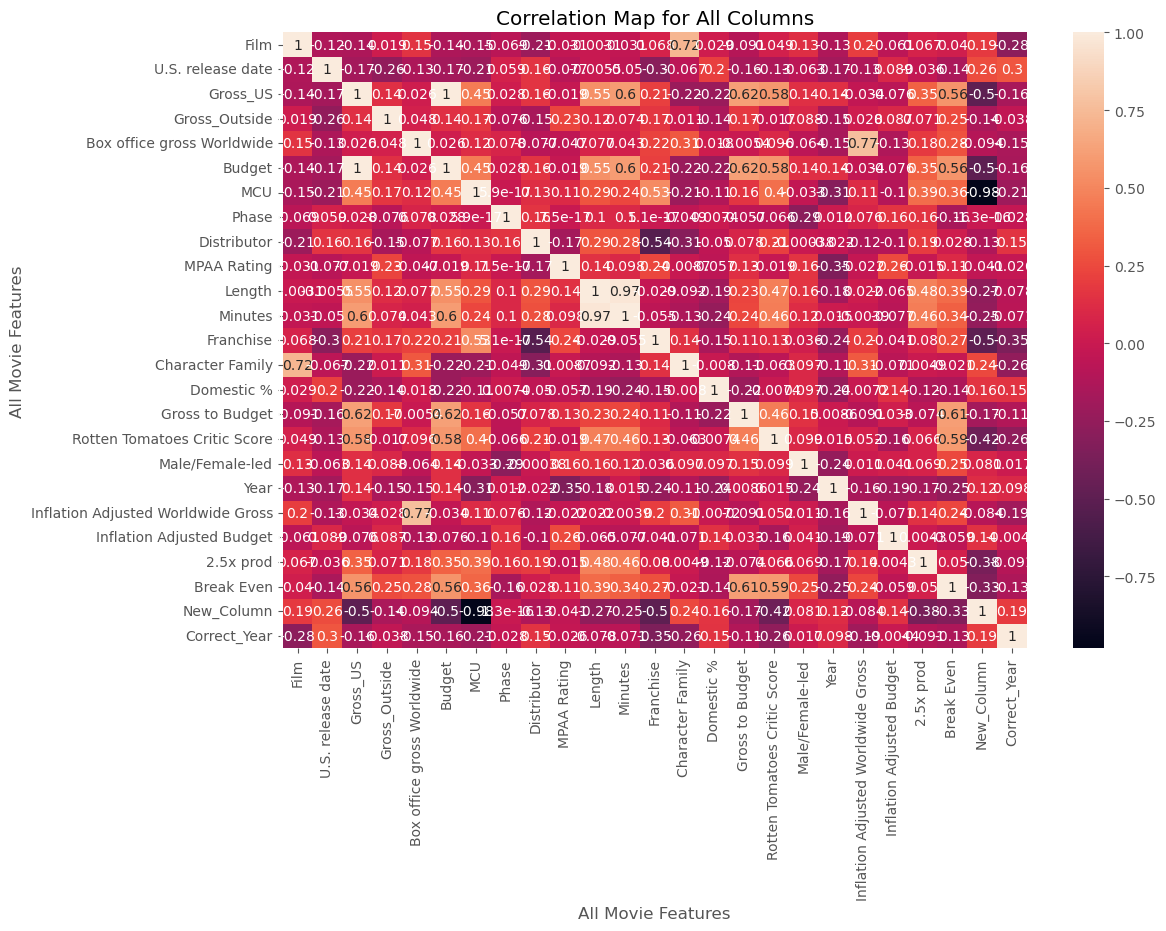

In [101]:
# Creating a heatmap to visually see what columns/features are most correlated with Gross income of US/Canada and Outside of US/Canada.

correlation_map = df.corr(method='pearson')
sns.heatmap(correlation_map, annot=True)
plt.title('Correlation Map for All Columns')
plt.xlabel('All Movie Features')
plt.ylabel('All Movie Features')
plt.show()

In [102]:
# Bigger numbers are overlapping each other on the heatmap so I am creating a list of all correlations higher than 50%.

corr_list = df_num.corr()
corr_comparison = corr_list.unstack()
sorted_comparison = corr_comparison.sort_values()
higher_corr = sorted_comparison[(sorted_comparison) > 0.5]
pd.set_option('display.max_rows', None)           # <----------- This code shows all the results instead of just the first five and last five

higher_corr

Franchise                           MCU                                   0.527038
MCU                                 Franchise                             0.527038
Length                              Budget                                0.550807
Gross_US                            Length                                0.550807
Budget                              Length                                0.550807
Length                              Gross_US                              0.550807
Budget                              Break Even                            0.562171
Break Even                          Gross_US                              0.562171
                                    Budget                                0.562171
Gross_US                            Break Even                            0.562171
Rotten Tomatoes Critic Score        Budget                                0.581481
Budget                              Rotten Tomatoes Critic Score          0.581481
Rott

In [79]:
## Results

# This list shows that US/Canada gross income is highly correlated to gross_outside, gross to budget, minutes, length, and rotten tomatoes critics score. 
# This list shows that gross income outside of US/Canada is highly correlated to budget, gross_US, gross to budget, minutes, and length.

In [81]:
#I will also be doing a linear regression model to prdict the US gross revenue based on different features.
#I will add the columns with highest correlations from the correlation list to the X_train to see how its relation to Gross Incomes.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Data Cleaning
df.fillna(df.mean(), inplace=True)  # Replace NaNs with column means
df['Budget'] = df['Budget'].astype(str).str.replace(r'[\$,]', '', regex=True).astype(float)   #Converting Budget values to float.

#Providing values for the X and y values for the model
X = df[['Budget','Rotten Tomatoes Critic Score','Length','Minutes','Phase']]
y = df['Gross_US']

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   #80% is used for training and 20% for testing.

#Training the model
model = LinearRegression()
model.fit(X_train, y_train)

#Making my predictions
y_pred = model.predict(X_test)

#Checking my error
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_test, y_pred) * 100
print(f'MAPE: {mape}%')

#Converting it to show accuracy intead of error
accuracy = 100 - mape
print(f'Accuracy: {accuracy}%')

MAPE: 2.078251208145262e-12%
Accuracy: 99.99999999999793%


In [82]:
## Final Results

# My hypothesis is proven to be incorrect.
# I thought that higher budgets, release date, and rotten tomatoes critics score would be the only high correlations for gross income in US/Canada.
# I failed to think of factors such as the length/minutes of the video.
# My hypothesis for foreign countries was budget and rotten tomatoes critic score.
# However it was more closely related to the length/minutes of the movies instead of the rotten tomatoes critic score.

#This was further supported by my linear regression model.
#I created a model to see how closely related the highest correlation features were to the Gross Income.
#I found a mean absolute error value at almost zero, meaning that my model is 99.99% accurate.